In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [9]:
df = pd.read_csv('diabetes.xls')

In [10]:
df.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [67]:
shape=df.shape
print("Number of rows :",shape[0])
print("Number of  columns :",shape[1])

Number of rows : 768
Number of  columns : 9


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    float64
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
df.isnull().sum()

Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Outcome                     0
dtype: int64

In [14]:
# Rename the columns ,it is incorrect name according to cloumns values
df.rename(columns = { 
    'Unnamed: 0' : 'Pregnancies' , 
    'Pregnancies' : 'Glucose',
    'Glucose' : 'BloodPressure',
    'BloodPressure' : 'SkinThickness',
    'SkinThickness' : 'Insulin',
    'Insulin' : 'BMI',
    'BMI' : 'DiabetesPedigreeFunction',
    'DiabetesPedigreeFunction' : 'Age'
},inplace = True)
  

In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
# check duplicated data is present or not
df.duplicated().sum()

np.int64(0)

In [17]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


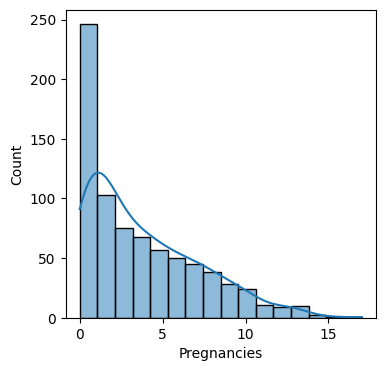

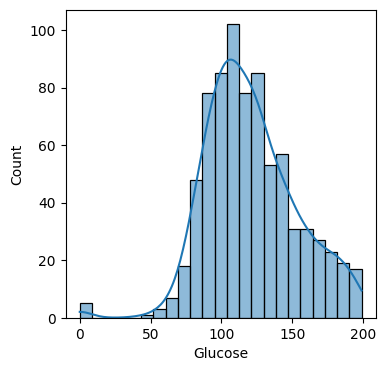

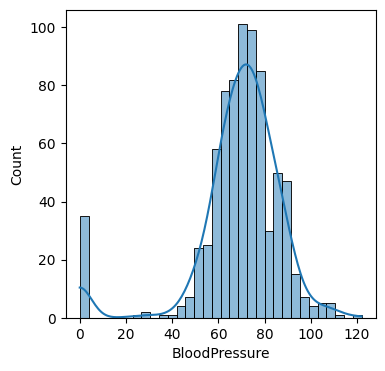

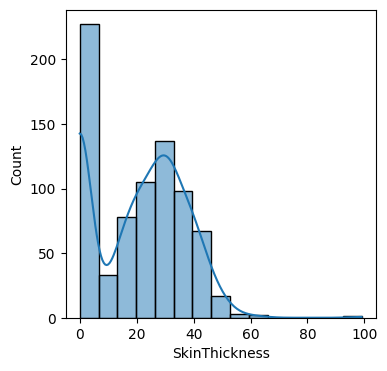

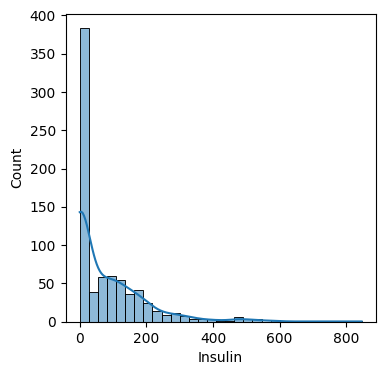

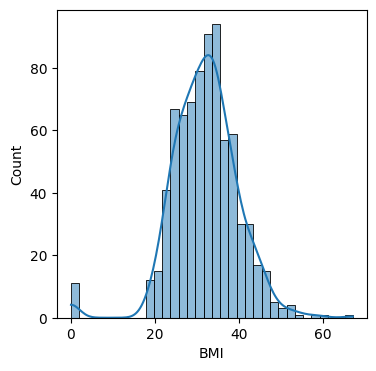

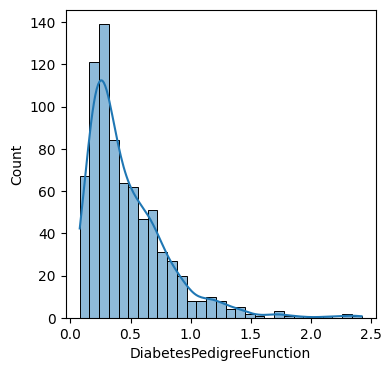

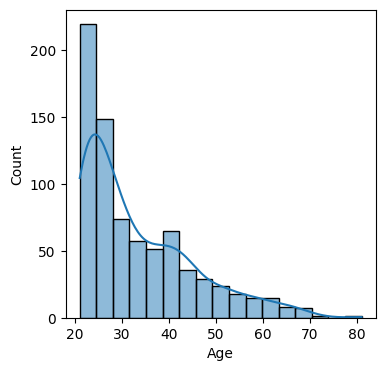

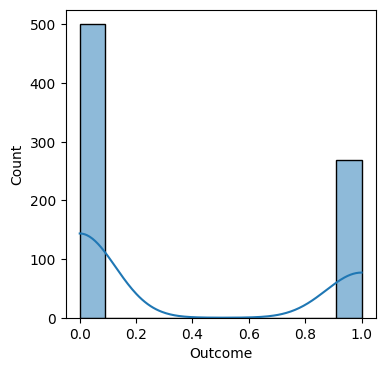

In [18]:
# distribution of features
column_name = df.columns
for i in column_name:
    plt.figure(figsize = (4,4))
    sns.histplot(df[i] ,kde=True)

In [19]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: >

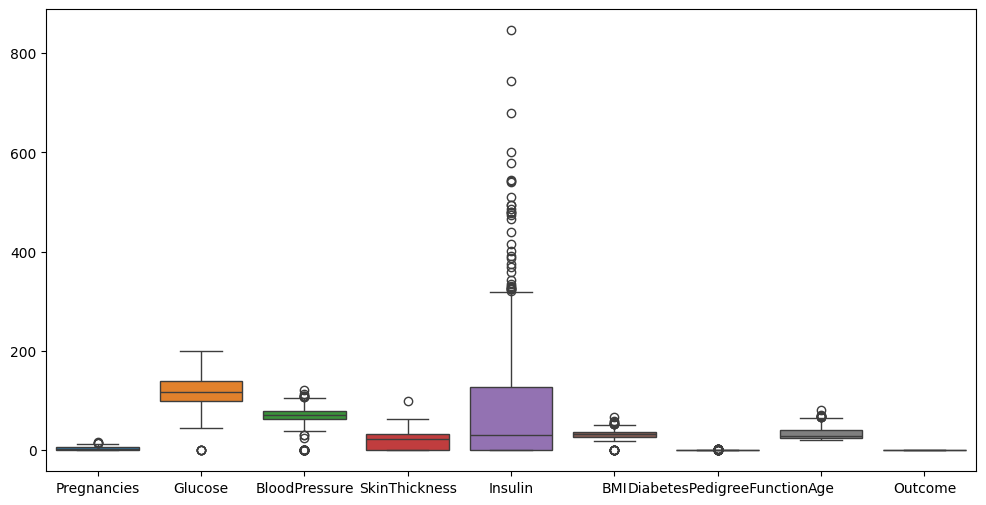

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(df)

<Axes: >

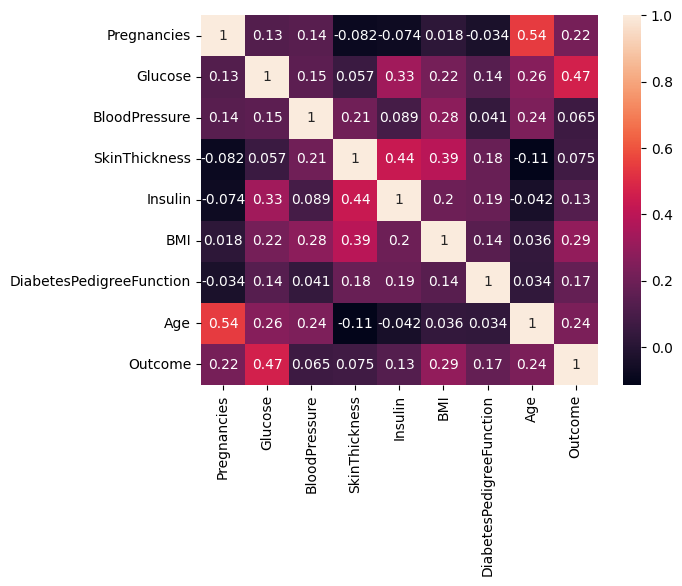

In [21]:
# correlation of each columns

sns.heatmap(df.corr(),annot =True)

In [22]:
# This garph display that BloodPressure and SkinThickness are less correlated with outcome for now we will use these features in our prediction and check accuracy.
# if we will get low accuracy with these features  at time we will remove it. 

In [23]:
print('Glucose_max :',df.Glucose.max())
print('Glucose_max :',df.Glucose.min())

Glucose_max : 199
Glucose_max : 0


In [24]:
# we are not creating the bins of Glucose level because data does not defind which time of Measure.

In [25]:
print('BloodPressure :',df.BloodPressure.max())
print('BloodPressure :',df.BloodPressure.min())

BloodPressure : 122
BloodPressure : 0


BloodPressure
Normal               563
High BP (Stage 1)    145
High BP (Stage 2)     60
Name: count, dtype: int64


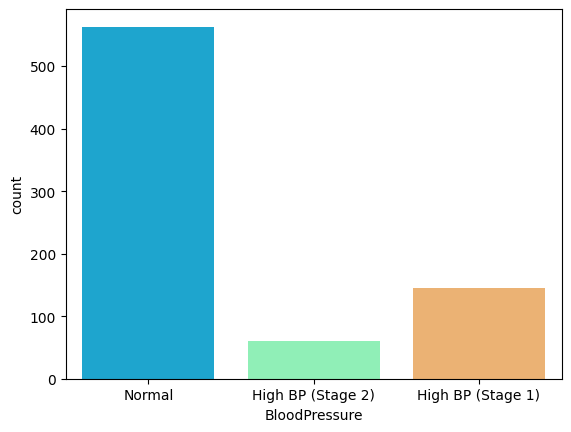

In [26]:

#for BloodPressure we create bins
BloodPressure_replace = lambda x : 'Normal' if x<80 else ('High BP (Stage 1)'if x<89 else 'High BP (Stage 2)')
df['BloodPressure']=df['BloodPressure'].apply(BloodPressure_replace)
print(df['BloodPressure'].value_counts())
sns.countplot(x=df['BloodPressure'],palette='rainbow')
plt.show()

In [27]:
print('BMI :',df.BMI.max())
print('BMI :',df.BMI.min())

BMI : 67.1
BMI : 0.0


BMI
Obesity           652
Healthy Weight    101
Underweight        15
Name: count, dtype: int64


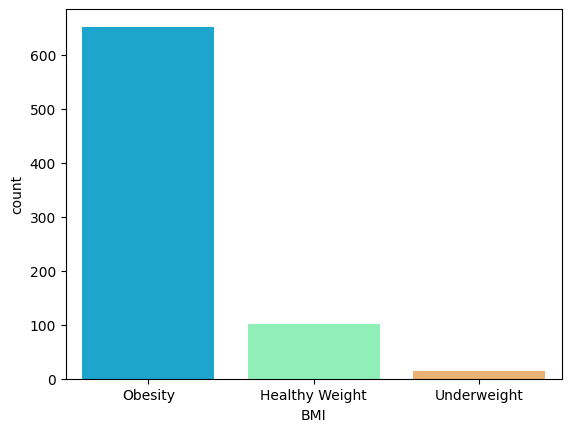

In [28]:
BMI_replace = lambda x : 'Underweight' if x<18.5 else ('Healthy Weight'if x<24.9 else 'Obesity')
df['BMI']=df['BMI'].apply(BMI_replace)
print(df['BMI'].value_counts())
sns.countplot(x=df['BMI'],palette='rainbow')
plt.show()

In [29]:
df['SkinThickness'].value_counts().head()

SkinThickness
0     227
32     31
30     27
27     23
23     22
Name: count, dtype: int64

In [30]:
# SkinThickness  : 0 is high . so ,we will replace 0 with mean value
def replace_mean (column):
    df[column].replace(0, np.mean(df[column]), inplace=True)

In [31]:
replace_mean('SkinThickness')

In [32]:
# same with Insulin
df['Insulin'].value_counts().head()

Insulin
0      374
105     11
130      9
140      9
120      8
Name: count, dtype: int64

In [33]:
replace_mean('Insulin')

In [34]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,Normal,35.000000,79.799479,Obesity,0.627,50,1
1,1,85,Normal,29.000000,79.799479,Obesity,0.351,31,0
2,8,183,Normal,20.536458,79.799479,Healthy Weight,0.672,32,1
3,1,89,Normal,23.000000,94.000000,Obesity,0.167,21,0
4,0,137,Normal,35.000000,168.000000,Obesity,2.288,33,1


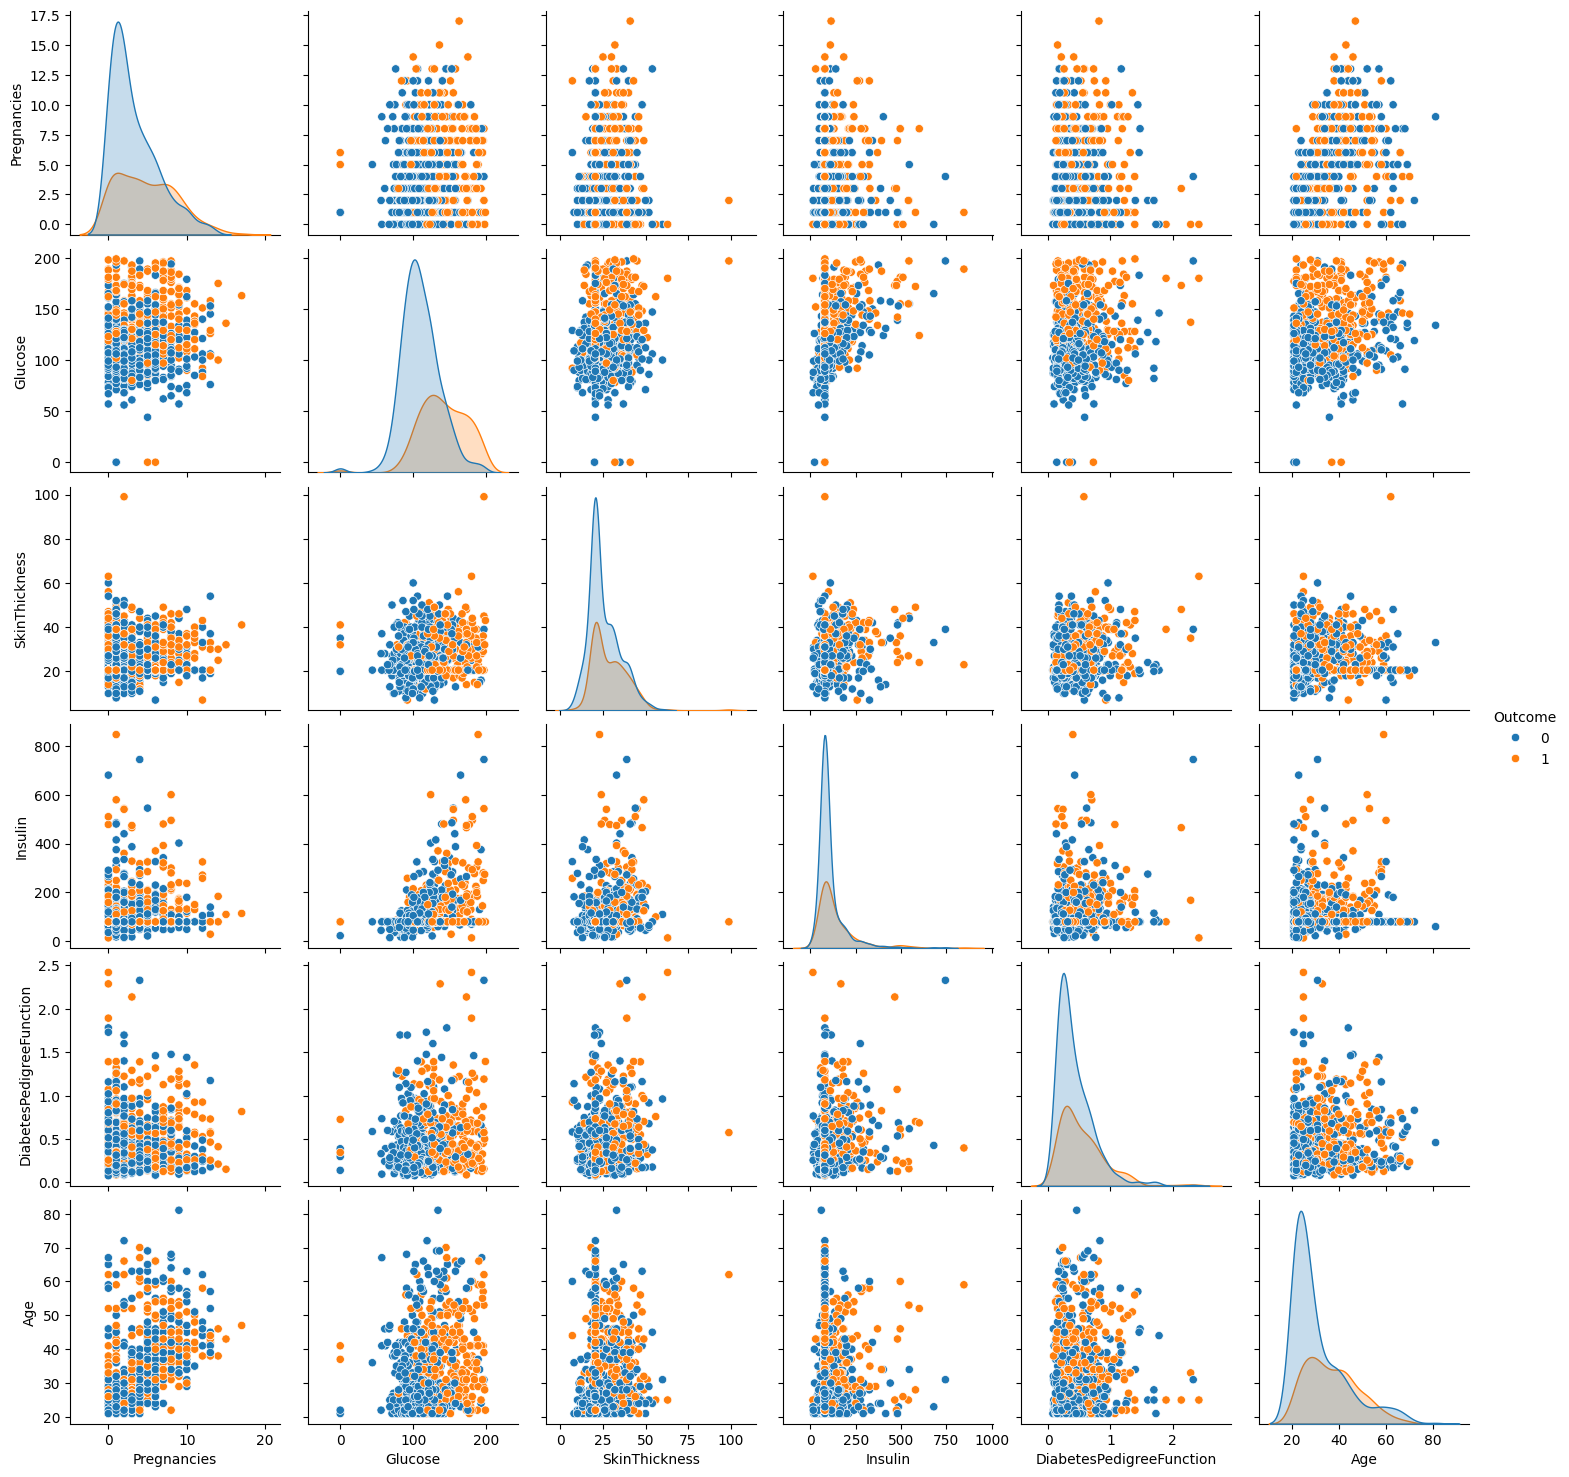

In [35]:
#pairplot
sns.pairplot(df , hue='Outcome')
plt.show()

In [36]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                object
SkinThickness               float64
Insulin                     float64
BMI                          object
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [37]:
df.shape

(768, 9)

In [38]:
# divide columns according datatype
cat = df.select_dtypes(
    include = ['object']
).columns.tolist()
cat

['BloodPressure', 'BMI']

In [39]:
num = df.select_dtypes(
    include = ['int64','float64']
).columns.tolist()
num

['Pregnancies',
 'Glucose',
 'SkinThickness',
 'Insulin',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [40]:
# divide features into input and target
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print('x shape :' ,x.shape)
print('y shape :',y.shape)

x shape : (768, 8)
y shape : (768,)


<Axes: xlabel='Outcome', ylabel='count'>

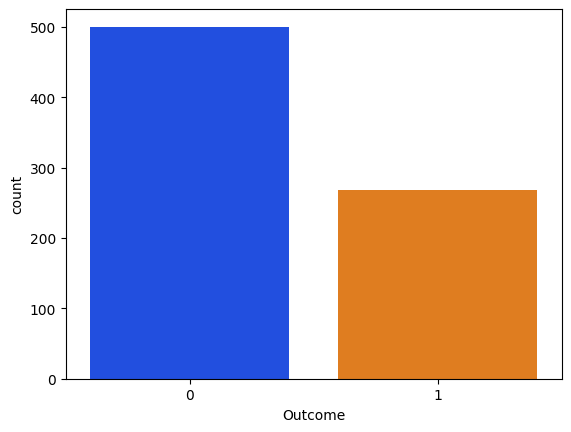

In [41]:
sns.countplot(x='Outcome',data=df,palette='bright') 

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2 ,random_state =42)
print('x_train shape :',x_train.shape)
print('y_train shape :',y_train.shape)

x_train shape : (614, 8)
y_train shape : (614,)


In [43]:
# OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder ,StandardScaler

preprocess = ColumnTransformer(
    transformers = [
        ('cat' , OneHotEncoder(sparse_output=False,drop='first'),['BloodPressure', 'BMI']),
        ('num',StandardScaler(),['Pregnancies','Glucose','SkinThickness','Insulin','DiabetesPedigreeFunction','Age'])

    ])
    

In [44]:
# This problem is binary classifiction so,we will import classification algorithms

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import  SMOTE
# metrics
from sklearn.metrics import accuracy_score,confusion_matrix ,classification_report
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV

In [45]:
# for model building we will use pipeline
from imblearn.pipeline import Pipeline

### LogisticRegression

In [46]:
# Define parameter grid
param_grid = {
    'logreg__C': [1]
}
pipe = Pipeline([
    ('preprocess', preprocess),  
    ('smote', SMOTE(random_state=42)),  
    ('logreg', LogisticRegression())      
])

# Define parameter grid


# GridSearch
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)


l_pred = grid.predict(x_test)

print('Classification Report:\n', classification_report(y_test, l_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, l_pred))
print('Accuracy Score:', accuracy_score(y_test, l_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.70      0.77        99
           1       0.59      0.80      0.68        55

    accuracy                           0.73       154
   macro avg       0.73      0.75      0.73       154
weighted avg       0.77      0.73      0.74       154

Confusion Matrix:
 [[69 30]
 [11 44]]
Accuracy Score: 0.7337662337662337


### KNeighborsClassifier

In [47]:
param_grid = {
    'knn__n_neighbors': [6],
    'knn__algorithm': ['auto'],
}
pipe = Pipeline([
    ('preprocess', preprocess), 
    ('smote', SMOTE(random_state=42)),
    ('knn', KNeighborsClassifier())      
])


grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='accuracy')


grid.fit(x_train, y_train)


k_pred = grid.predict(x_test)

print('Classification Report:\n', classification_report(y_test, k_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, k_pred))
print('Accuracy Score:', accuracy_score(y_test, k_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.73      0.77        99
           1       0.59      0.71      0.64        55

    accuracy                           0.72       154
   macro avg       0.70      0.72      0.71       154
weighted avg       0.74      0.72      0.73       154

Confusion Matrix:
 [[72 27]
 [16 39]]
Accuracy Score: 0.7207792207792207


### SVC

In [48]:
param_grid = {
    'svc__kernel': ['poly'],
}
pipe = Pipeline([
    ('preprocess', preprocess),  
    ('smote', SMOTE(random_state=42)),
    ('svc', SVC())      
])


grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='accuracy')


grid.fit(x_train, y_train)


s_pred = grid.predict(x_test)

print('Classification Report:\n', classification_report(y_test, s_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, s_pred))
print('Accuracy Score:', accuracy_score(y_test, s_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.75      0.77        99
           1       0.60      0.67      0.63        55

    accuracy                           0.72       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.72      0.72       154

Confusion Matrix:
 [[74 25]
 [18 37]]
Accuracy Score: 0.7207792207792207


### GaussianNB

In [49]:
param_grid = {
    'gnb__var_smoothing': [1e-9]
}

pipe = Pipeline([
    ('preprocess', preprocess),  
    ('smote', SMOTE(random_state=42)),
    ('gnb', GaussianNB())      
])


grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='accuracy')


grid.fit(x_train, y_train)


g_pred = grid.predict(x_test)

print('Classification Report:\n', classification_report(y_test, g_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, g_pred))
print('Accuracy Score:', accuracy_score(y_test, g_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.49      0.64        99
           1       0.50      0.91      0.65        55

    accuracy                           0.64       154
   macro avg       0.70      0.70      0.64       154
weighted avg       0.76      0.64      0.64       154

Confusion Matrix:
 [[49 50]
 [ 5 50]]
Accuracy Score: 0.6428571428571429


###  DecisionTreeClassifier

In [50]:
param_grid = {
    'dt__criterion': ['entropy'],
    'dt__max_depth': [32],
    'dt__min_samples_split':[28],
    'dt__min_samples_leaf': [5]
}

pipe = Pipeline([
    ('preprocess', preprocess),   
    ('smote', SMOTE(random_state=42)),
    ('dt',  DecisionTreeClassifier())      
])


grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='accuracy')


grid.fit(x_train, y_train)


d_pred = grid.predict(x_test)

print('Classification Report:\n', classification_report(y_test, d_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, d_pred))
print('Accuracy Score:', accuracy_score(y_test, d_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.78      0.77        99
           1       0.59      0.58      0.59        55

    accuracy                           0.71       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.71      0.71      0.71       154

Confusion Matrix:
 [[77 22]
 [23 32]]
Accuracy Score: 0.7077922077922078


### GradientboostClassifier


In [51]:
from sklearn.ensemble import GradientBoostingClassifier

pipe = Pipeline([
    ('preprocess', preprocess), 
    ('smote', SMOTE(random_state=42)),
    ('gc',  GradientBoostingClassifier(n_estimators=100,learning_rate=0.07,max_depth=2,random_state=42))      
])

pipe.fit(x_train, y_train)


gc_pred = pipe.predict(x_test)

print('Classification Report:\n', classification_report(y_test, gc_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, gc_pred))
print('Accuracy Score:', accuracy_score(y_test, gc_pred))
print('cross_val_score :', np.mean(cross_val_score(pipe ,x_train ,y_train ,cv=5)))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.74      0.80        99
           1       0.63      0.82      0.71        55

    accuracy                           0.77       154
   macro avg       0.76      0.78      0.76       154
weighted avg       0.79      0.77      0.77       154

Confusion Matrix:
 [[73 26]
 [10 45]]
Accuracy Score: 0.7662337662337663
cross_val_score : 0.74916699986672


### Voting

In [52]:
from sklearn.ensemble import VotingClassifier

dt = DecisionTreeClassifier()
knn =KNeighborsClassifier()
lr=LogisticRegression()


estimators = [ ('dt',dt) ,('knn',knn) ,('lr',lr)]

pipe = Pipeline([
    ('preprocess', preprocess),
    ('smote', SMOTE(random_state=42)),
    ('vc' , VotingClassifier(estimators=estimators ,voting='hard',weights=[2,5,1]))
])

pipe.fit(x_train, y_train)

vc_pred = pipe.predict(x_test)

print('Classification Report:\n', classification_report(y_test, vc_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, vc_pred))
print('Accuracy Score:', accuracy_score(y_test, vc_pred))
print('cross_val_score :', np.mean(cross_val_score(pipe ,x_train ,y_train ,cv=5)))
    

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.61      0.69        99
           1       0.50      0.71      0.59        55

    accuracy                           0.64       154
   macro avg       0.64      0.66      0.64       154
weighted avg       0.69      0.64      0.65       154

Confusion Matrix:
 [[60 39]
 [16 39]]
Accuracy Score: 0.6428571428571429
cross_val_score : 0.7166600026656005


### Stacking

In [53]:
from sklearn.ensemble import StackingClassifier

dt =DecisionTreeClassifier()
knn =KNeighborsClassifier()
lr=LogisticRegression()

estimators = [ ('dt',dt) ,('knn',knn) ,('lr',lr)]
final_estimator = DecisionTreeClassifier()


pipe = Pipeline([
('preprocess', preprocess),
('smote', SMOTE(random_state=42)),
('st' , StackingClassifier(estimators=estimators,final_estimator =final_estimator,cv=10))
])

pipe.fit(x_train, y_train)

sc_pred = pipe.predict(x_test)

print('Classification Report:\n', classification_report(y_test, sc_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, sc_pred))
print('Accuracy Score:', accuracy_score(y_test, sc_pred))
print('cross_val_score :', np.mean(cross_val_score(pipe ,x_train ,y_train ,cv=5)))
    

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.66      0.72        99
           1       0.53      0.69      0.60        55

    accuracy                           0.67       154
   macro avg       0.66      0.67      0.66       154
weighted avg       0.70      0.67      0.68       154

Confusion Matrix:
 [[65 34]
 [17 38]]
Accuracy Score: 0.6688311688311688
cross_val_score : 0.675942956150873


### RandomForestClassifier

In [54]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([
    ('preprocess', preprocess),   
    ('smote', SMOTE(random_state=42)),
    ('rf',  RandomForestClassifier(n_estimators=100,criterion='entropy',min_samples_split=19,n_jobs=-1,min_samples_leaf=1))  # n_jobs=-1 → use all available cores (fastest training).    
])

pipe.fit(x_train, y_train)


r_pred = pipe.predict(x_test)

print('Classification Report:\n', classification_report(y_test, r_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, r_pred))
print('Accuracy Score:', accuracy_score(y_test, r_pred))
print('cross_val_score :', np.mean(cross_val_score(pipe ,x_train ,y_train ,cv=5)))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.77      0.82        99
           1       0.66      0.80      0.72        55

    accuracy                           0.78       154
   macro avg       0.77      0.78      0.77       154
weighted avg       0.80      0.78      0.78       154

Confusion Matrix:
 [[76 23]
 [11 44]]
Accuracy Score: 0.7792207792207793
cross_val_score : 0.7524590163934426


In [55]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

##### RandomForestClassifier is give best accuracy among all algorithms

## Prediction 

In [56]:
file=pickle.load(open('pipe.pkl', 'rb'))
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [57]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                object
SkinThickness               float64
Insulin                     float64
BMI                          object
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [58]:
def predict ():
    Pregnancies=int(input('enter your Pregnancies count :'))
    Glucose=int(input('enter your Glucose level :'))
    BloodPressure=input('enter your BloodPressure level :')
    SkinThickness = float(input('enter your SkinThickness :'))
    Insulin = float(input('enter your Insulin level :'))
    BMI  = input('enter your BMI  score :')
    DiabetesPedigreeFunction  = float(input('enter your DiabetesPedigreeFunction  score :'))
    Age  = int(input('enter your Age :'))
    
    new_data = pd.DataFrame([{'Pregnancies':Pregnancies,
                             'Glucose':Glucose,
                             'BloodPressure':BloodPressure,
                             'SkinThickness':SkinThickness,
                             'Insulin':Insulin,
                             'BMI':BMI,
                             'DiabetesPedigreeFunction':DiabetesPedigreeFunction,
                             'Age':Age}])
    pred_output=file.predict(new_data)
                             
    if pred_output == 1 :
        print ("Your diabetes report is positive")
    else:
        print ("Your diabetes report is negative")
    
  
    
    

In [64]:
predict()

enter your Pregnancies count : 1
enter your Glucose level : 138
enter your BloodPressure level : High BP (Stage 1)
enter your SkinThickness : 20.536458
enter your Insulin level : 79.799479
enter your BMI  score : Obesity
enter your DiabetesPedigreeFunction  score : 0.236
enter your Age : 28


Your diabetes report is negative


In [65]:
predict()

enter your Pregnancies count : 6
enter your Glucose level : 190
enter your BloodPressure level : High BP (Stage 2)
enter your SkinThickness : 20.536458
enter your Insulin level : 79.799479
enter your BMI  score : Obesity
enter your DiabetesPedigreeFunction  score : 0.278
enter your Age : 66


Your diabetes report is positive


In [63]:
df.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
201,1,138,High BP (Stage 1),20.536458,79.799479,Obesity,0.236,28,0
553,1,88,Normal,24.000000,44.000000,Obesity,0.422,23,0
759,6,190,High BP (Stage 2),20.536458,79.799479,Obesity,0.278,66,1
